## Define subgroups
### Only 4 studies investigate the difference between patients with high intraperitoneal pressure (IPP) and low IPP
1. Giuliani A, Milan Manani S, Crepaldi C, Domenici A, Gastaldon F, Corradi V, et al. Intraperitoneal Pressure in Polycystic and Non-Polycystic Kidney Disease Patients, Treated by Peritoneal Dialysis. Blood Purification. 2020;49(6): 670–676. https://doi.org/10.1159/000506177.
2. Castellanos LB, Clemente EP, Cabañas CB, Parra DM, Contador MB, Morera JCO, et al. Clinical Relevance of Intraperitoneal Pressure in Peritoneal Dialysis Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2017;37(5): 562–567. https://doi.org/10.3747/pdi.2016.00267.
3. Dejardin A, Robert A, Goffin E. Intraperitoneal pressure in PD patients: relationship to intraperitoneal volume, body size and PD-related complications. Nephrology Dialysis Transplantation. 2007;22(5): 1437–1444. https://doi.org/10.1093/ndt/gfl745.
4. Betancourt L, Pico S, Rojas E, Gordo MJ, Oliva JC, Almirall J, et al. Relationship between intraperitoneal pressure and the development of hernias in peritoneal dialysis: confirmation for the first time of a widely accepted concept. International Urology and Nephrology. 2023; https://doi.org/10.1007/s11255-023-03663-5.


In [1]:
# Data provided for each study
import numpy as np
# Modifying the structure of the dictionary to include both mean and standard deviation
meta_analysis_data = {
    "Giuliani2020": {
        "Sample size": {"High IPP": 21, "Low IPP": 56},
        "IPP": {"High IPP": (18.5, 1.2), "Low IPP": (13.6, 2)},
        "BMI": {"High IPP": (29, 3.6), "Low IPP": (26, 4)},
        "BSA": {"High IPP": (1.89, 0.18), "Low IPP": (1.83, 0.19)},
        "IPV": {"High IPP": (2826, 265), "Low IPP": (2778, 336)},
        "IPV/BSA": {"High IPP": (1505, 175), "Low IPP": (1536, 274)},
        "Age": {"High IPP": (58.9, 13), "Low IPP": (61.6, 15.9)},
        "CCI": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)}
    },
    "Castellanos2017": {
        "Sample size": {"High IPP": 16, "Low IPP": 33},
        "IPP": {"High IPP": (22.29, 2.62), "Low IPP": (18.78, 2.6)},
        "BMI": {"High IPP": (31.67, 6.1), "Low IPP": (25.9, 3.4)},
        "BSA": {"High IPP": (1.92, 0.2), "Low IPP": (1.78, 0.2)},
        "IPV": {"High IPP": (2167, 466), "Low IPP": (2180, 271)},
        "IPV/BSA": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)},
        "Age": {"High IPP": (60.72, 12), "Low IPP": (61.28, 17)},
        "CCI": {"High IPP": (8.18, 2.9), "Low IPP": (7.5, 3.6)}
    },
    "Dejardin2007": {
        "Sample size": {"High IPP": 30, "Low IPP": 31},
        "IPP": {"High IPP": (15.7, 1.7), "Low IPP": (10.4, 2.1)},
        "BMI": {"High IPP": (24.6, 4.4), "Low IPP": (22.4, 3.2)},
        "BSA": {"High IPP": (1.81, 0.17), "Low IPP": (1.76, 0.21)},
        "IPV": {"High IPP": (1877, 263), "Low IPP": (1726, 301)},
        "IPV/BSA": {"High IPP": (1039, 139), "Low IPP": (988, 154)},
        "Age": {"High IPP": (53, 16.4), "Low IPP": (50, 17.5)},
        "CCI": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)}
    },
    "Betancourt2023": {
        "Sample size": {"High IPP": 23, "Low IPP": 101},
        "IPP": {"High IPP": (18.4, 4.58), "Low IPP": (16.2, 4.52)},
        "BMI": {"High IPP": (29.5, 5.36), "Low IPP": (27.3, 4.67)},
        "BSA": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)},
        "IPV": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)},
        "IPV/BSA": {"High IPP": (np.nan, np.nan), "Low IPP": (np.nan, np.nan)},
        "Age": {"High IPP": (67.6, 9.02), "Low IPP": (60.9, 16.1)},
        "CCI": {"High IPP": (5.1, 2.38), "Low IPP": (4.7, 1.86)}
    }
}

In [2]:
## Function to extract valid data and exclude np.nan
def extract_valid_data(data, var_key):
    """
    Extract valid data from the meta_analysis_data dictionary for a given variable (var_key)
    and return it in a simplified structure containing only the variable of interest.
    
    Parameters:
    - data: The data dictionary.
    - var_key: The variable key for which valid data needs to be extracted.
    
    Returns:
    - valid_data: A dictionary in a simplified structure with only the variable of interest.
    """
    valid_data = {}
    
    for study_id, study_data in data.items():
        # Extracting the mean value for the given variable
        high_ipp_value = study_data[var_key]["High IPP"][0]
        low_ipp_value = study_data[var_key]["Low IPP"][0]
        
        # Checking if neither value is NaN
        if not (np.isnan(high_ipp_value) or np.isnan(low_ipp_value)):
            valid_data[study_id] = {var_key: study_data[var_key]}
    
    return valid_data

Hedge's $g$ is used to provide an unbiased estimate of the population effect size, particularly when sample sizes are small.


Hedge's $g$ is calculated as:

$$
g = \frac{{\bar{X}_1 - \bar{X}_2}}{\sqrt{\frac{{(n_1 - 1) \times SD_1^2 + (n_2 - 1) \times SD_2^2}}{{n_1 + n_2 - 2}}}}
$$

where:

- $\bar{X}_1$ and $\bar{X}_2$ are the means of the two groups being compared.
- $ n_1 $ and $ n_2 $ are the sample sizes of the two groups.
- $ SD_1 $ and $ SD_2 $ are the standard deviations of the two groups.

In [3]:
def compute_hedges_g(mean1, sd1, n1, mean2, sd2, n2):
    """
    Compute Hedge's g for given means, standard deviations, and sample sizes of two groups.
    
    Parameters:
    - mean1, sd1, n1: Mean, standard deviation, and sample size for group 1.
    - mean2, sd2, n2: Mean, standard deviation, and sample size for group 2.
    
    Returns:
    - g: Hedge's g value.
    """
    pooled_sd = np.sqrt(((n1 - 1) * sd1**2 + (n2 - 1) * sd2**2) / (n1 + n2 - 2))
    g = (mean1 - mean2) / pooled_sd
    # Adjusting for small sample sizes
    g_adjusted = g * (1 - (3 / (4 * (n1 + n2) - 9)))
    return g_adjusted

### Compute the Hedge's $g$ of all variables, IPP will be the last

In [4]:
# List of variables to compute Hedge's g for
variables_to_analyze = ["BMI", "BSA", "IPV", "IPV/BSA", "Age", "CCI", "IPP"]

# Compute Hedge's g for BMI for each study
hedges_g_values_all = {}

for var in variables_to_analyze:
    hedges_g_values_var = {}
    
    # Extract valid data for the current variable
    extracted_data_var = extract_valid_data(meta_analysis_data, var)
    
    for study_id, study_data in extracted_data_var.items():
        mean_high_ipp = study_data[var]["High IPP"][0]
        sd_high_ipp = study_data[var]["High IPP"][1]
        n_high_ipp = meta_analysis_data[study_id]["Sample size"]["High IPP"]
        
        mean_low_ipp = study_data[var]["Low IPP"][0]
        sd_low_ipp = study_data[var]["Low IPP"][1]
        n_low_ipp = meta_analysis_data[study_id]["Sample size"]["Low IPP"]
        
        g = compute_hedges_g(mean_high_ipp, sd_high_ipp, n_high_ipp, mean_low_ipp, sd_low_ipp, n_low_ipp)
        hedges_g_values_var[study_id] = g
    
    hedges_g_values_all[var] = hedges_g_values_var
    
hedges_g_values_all

{'BMI': {'Giuliani2020': 0.7620306172693274,
  'Castellanos2017': 1.277646152501868,
  'Dejardin2007': 0.5660423132170047,
  'Betancourt2023': 0.4553430052734061},
 'BSA': {'Giuliani2020': 0.3169828336708109,
  'Castellanos2017': 0.6887700534759353,
  'Dejardin2007': 0.25791624727104745},
 'IPV': {'Giuliani2020': 0.14913934450034685,
  'Castellanos2017': -0.0370327288575305,
  'Dejardin2007': 0.5268309769822632},
 'IPV/BSA': {'Giuliani2020': -0.12205251348722773,
  'Dejardin2007': 0.34293260016204147},
 'Age': {'Giuliani2020': -0.1760702090857147,
  'Castellanos2017': -0.03536783014515095,
  'Dejardin2007': 0.17454390721373314,
  'Betancourt2023': 0.4418202094781204},
 'CCI': {'Castellanos2017': 0.19723664720738313,
  'Betancourt2023': 0.20241423479465673},
 'IPP': {'Giuliani2020': 2.6633120035158924,
  'Castellanos2017': 1.325080685980703,
  'Dejardin2007': 2.733912221073099,
  'Betancourt2023': 0.4825659505132401}}

### Data synthesis by DerSimonian and Laird random effects model

### Steps:

1. **Compute the weighted mean of the effect sizes**:
   
   $$
   \bar{g} = \frac{\sum w_i g_i}{\sum w_i}
   $$
   
   where $ g_i $ is the effect size for study $ i $, and $ w_i $ is the weight for study $ i $.

2. **Compute the Cochran's $ Q $ statistic**:
   
   $$
   Q = \sum w_i (g_i - \bar{g})^2
   $$

3. **Estimate between-study variance $ \tau^2 $**:

   $$
   \tau^2 = \frac{Q - (k - 1)}{\sum w_i - \frac{\sum w_i^2}{\sum w_i}}
   $$
   
   where $ k $ is the number of studies. 

4. **Compute the weights for the random effects model**:

   $$
   w_{i,RE} = \frac{1}{\frac{1}{w_i} + \tau^2}
   $$

5. **Compute the pooled effect size using the random effects weights**:

   $$
   \bar{g}_{RE} = \frac{\sum w_{i,RE} g_i}{\sum w_{i,RE}}
   $$

6. **Compute the variance and confidence interval for the pooled effect size**.

### Important Notes:

- The random effects model takes into account both within-study and between-study variance.
- $ I^2 $ is a measure of heterogeneity, representing the percentage of observed variance that would not be expected by chance.
- If $ I^2 $ is 0%, it indicates no observed heterogeneity. Values of 25%, 50%, and 75% are considered low, moderate, and high heterogeneity, respectively.

In [13]:
from scipy import stats

def compute_variance_for_hedges_g(n1, n2):
    """
    Compute the variance for Hedge's g for two groups.
    
    Parameters:
    - n1: Sample size for group 1.
    - n2: Sample size for group 2.
    
    Returns:
    - Variance for Hedge's g.
    """
    return (n1 + n2) / (n1 * n2) + (compute_hedges_g(1, 1, n1, 0, 1, n2) ** 2) / (2 * (n1 + n2))

# Adjust the variance computation in the meta-analysis function
def perform_meta_analysis_DSL_corrected_v2(valid_data, meta_analysis_data):
    """
    Perform meta-analysis using the DerSimonian and Laird random effects model on the Hedge's g values.
    
    Parameters:
    - valid_data: Dictionary containing study_ids, n, g, and var_z.
    - meta_analysis_data: The original meta analysis data.
    
    Returns:
    - A dictionary with meta-analysis results: combined effect size, 95% CI, and other statistics.
    """
    n = len(valid_data['g'])
    
    study_ids = valid_data['study_ids']
    g = np.array(valid_data['g'])
    var_g = np.array(valid_data['var_z'])
    
    # Remaining computations stay the same as before
    w = 1 / var_g
    g_bar = np.sum(w * g) / np.sum(w)
    Q = np.sum(w * (g - g_bar)**2)
    df = n - 1
    c = np.sum(w)
    tau2 = (Q - df) / (c - np.sum(w**2) / c)
    tau2 = max(0, tau2)
    w_star = 1 / (var_g + tau2)
    g_bar_star = np.sum(w_star * g) / np.sum(w_star)
    se_g_bar_star = np.sqrt(1 / np.sum(w_star))
    ci_g_bar_star = (g_bar_star - 1.96 * se_g_bar_star, g_bar_star + 1.96 * se_g_bar_star)
    I2 = 100 * (Q - df) / Q if Q > df else 0
    p_value_Q = 1 - stats.chi2.cdf(Q, df)
    ci_g_values = {}
    for study_id in study_ids:
        index = study_ids.index(study_id)
        ci_g_values[study_id] = (g[index] - 1.96 * np.sqrt(var_g[index]), 
                                 g[index] + 1.96 * np.sqrt(var_g[index]))
    
    return {
        'g_bar_RE': g_bar_star,
        'ci_g_bar_RE': ci_g_bar_star,
        'study_ids': study_ids,
        'g_values': g,
        'ci_g_values': ci_g_values,
        'weights_percent': (w_star / np.sum(w_star)) * 100,
        'I2': I2,
        'Q': Q,
        'p_value_Q': p_value_Q
    }

from scipy import stats

# With the stats module now imported, we'll rerun the meta-analysis
meta_analysis_results = {}

for var in variables_to_analyze:
    valid_data = {
        'study_ids': [],
        'n': [],
        'g': [],
        'var_z': []
    }
    
    extracted_data_var = extract_valid_data(meta_analysis_data, var)
    for study_id, study_data in extracted_data_var.items():
        n_high_ipp = meta_analysis_data[study_id]["Sample size"]["High IPP"]
        n_low_ipp = meta_analysis_data[study_id]["Sample size"]["Low IPP"]
        n_total = n_high_ipp + n_low_ipp
        g = hedges_g_values_all[var][study_id]
        var_g = ((n_high_ipp + n_low_ipp) / (n_high_ipp * n_low_ipp)) + (g**2 / (2 * n_total))  # variance of Hedge's g
        
        valid_data['study_ids'].append(study_id)
        valid_data['n'].append(n_total)
        valid_data['g'].append(g)
        valid_data['var_z'].append(var_g)
    
    results = perform_meta_analysis_DSL_corrected_v2(valid_data, meta_analysis_data)
    meta_analysis_results[var] = results

meta_analysis_results


{'BMI': {'g_bar_RE': 0.7148808476490082,
  'ci_g_bar_RE': (0.39411794515555715, 1.0356437501424591),
  'study_ids': ['Giuliani2020',
   'Castellanos2017',
   'Dejardin2007',
   'Betancourt2023'],
  'g_values': array([0.76203062, 1.27764615, 0.56604231, 0.45534301]),
  'ci_g_values': {'Giuliani2020': (0.24626039145298606, 1.2778008430856689),
   'Castellanos2017': (0.6291853556147841, 1.9261069493889522),
   'Dejardin2007': (0.05411950646435093, 1.0779651199696585),
   'Betancourt2023': (-0.001026857277064308, 0.9117128678238765)},
  'weights_percent': array([25.64050767, 18.51327622, 25.89567109, 29.95054502]),
  'I2': 32.87735499683482,
  'Q': 4.4694305474084555,
  'p_value_Q': 0.21503327436074882},
 'BSA': {'g_bar_RE': 0.3889746489864207,
  'ci_g_bar_RE': (0.08092777755562058, 0.6970215204172208),
  'study_ids': ['Giuliani2020', 'Castellanos2017', 'Dejardin2007'],
  'g_values': array([0.31698283, 0.68877005, 0.25791625]),
  'ci_g_values': {'Giuliani2020': (-0.18704078247215095, 0.821

## Visualisation

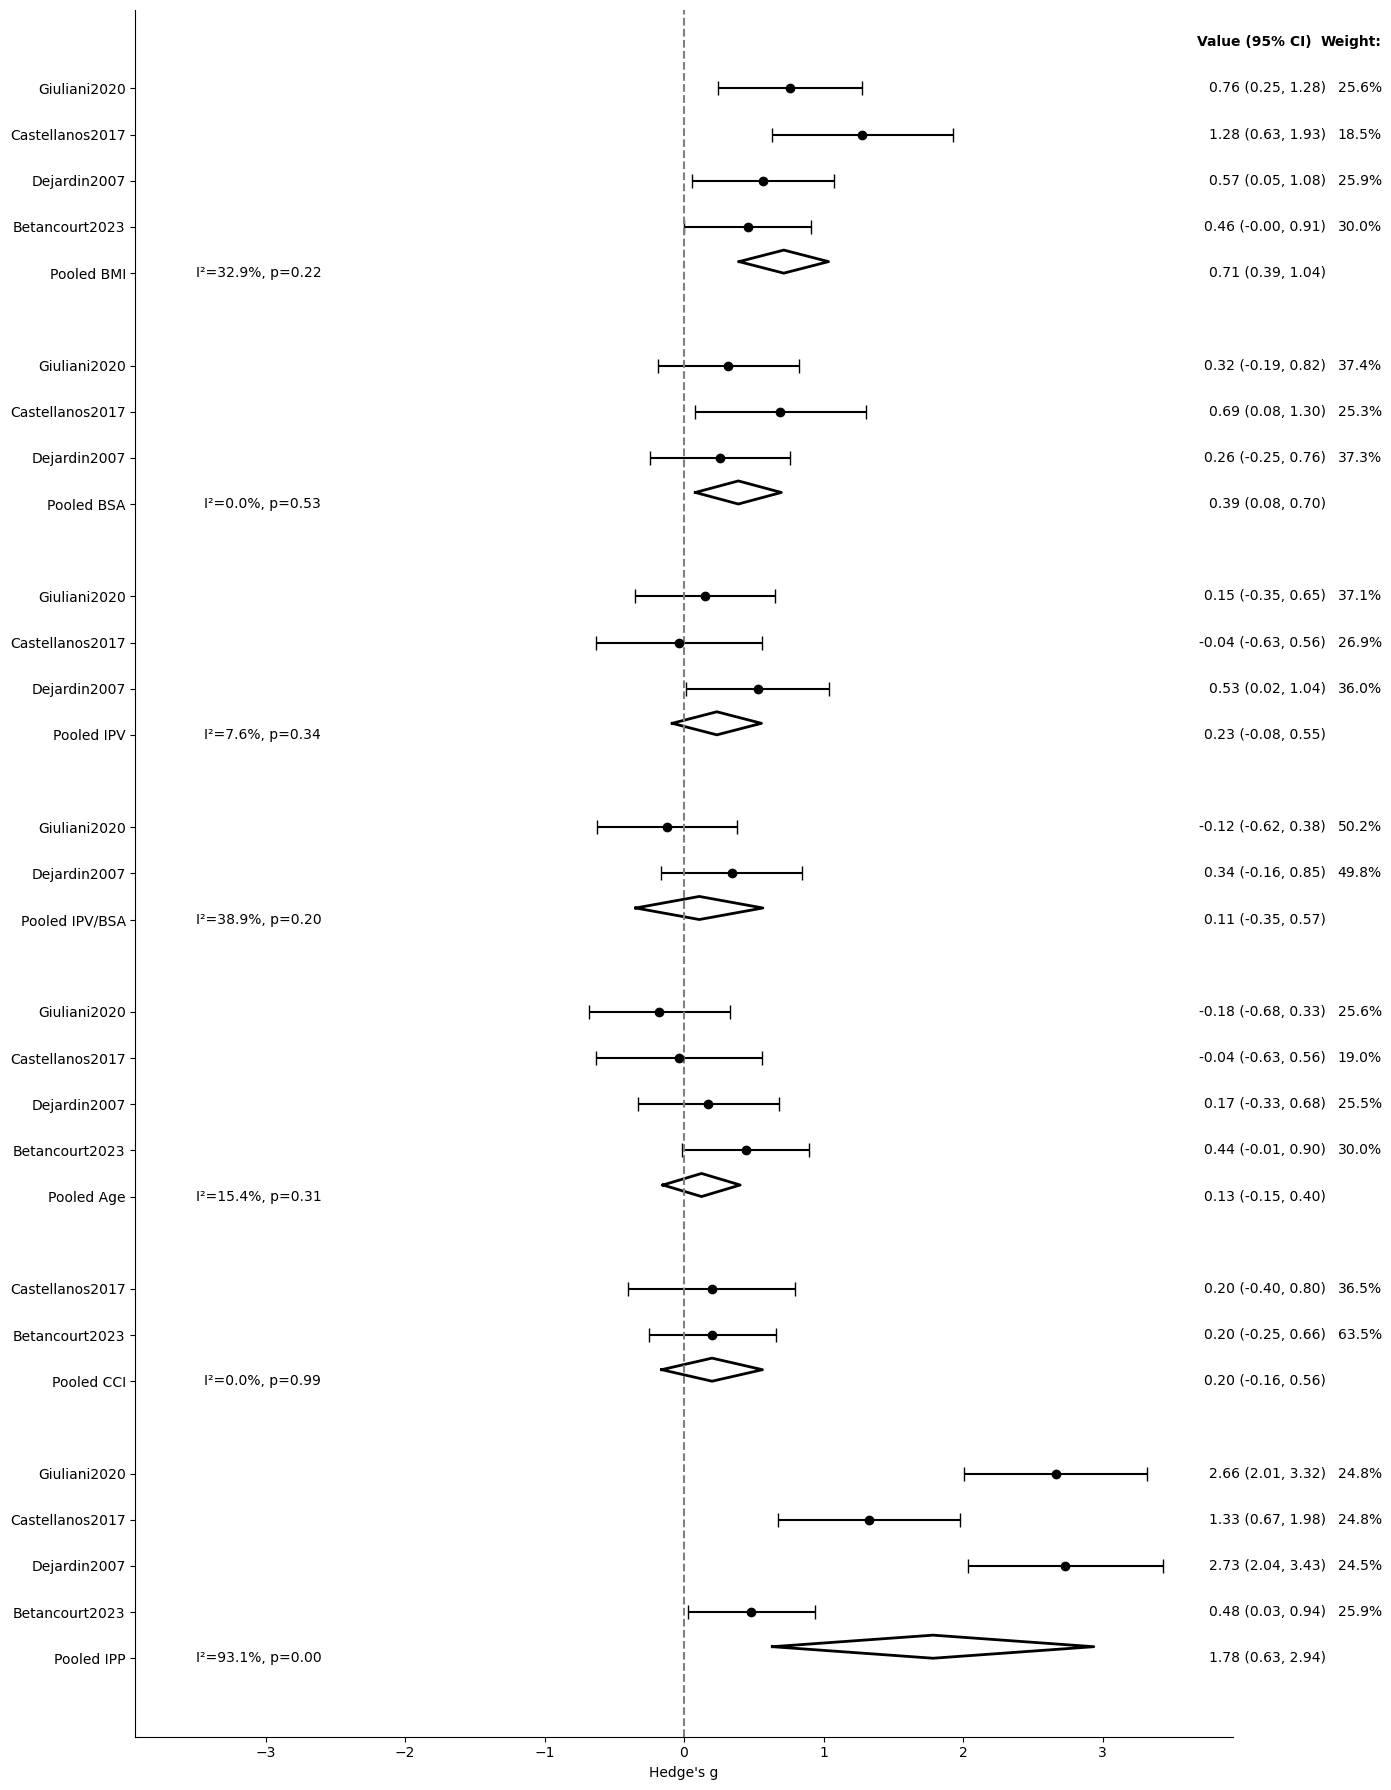

In [15]:
import matplotlib.pyplot as plt
# Calculate total number of studies across all variables
total_studies = sum([len(data['study_ids']) for data in meta_analysis_results.values()])
# Modifying the provided format to add the requirements

fig, ax = plt.subplots(figsize=(14, total_studies * 0.5 + len(meta_analysis_results)))

# Removing the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Current y-position marker
current_y = total_studies + len(meta_analysis_results)

y_ticks = []
y_ticklabels = []

for var, data in meta_analysis_results.items():
    # Extract data for plotting
    y_positions = list(range(current_y - 1, current_y - len(data['study_ids']) - 1, -1))
    g_values = data['g_values']
    ci_low = [g - data['ci_g_values'][study][0] for study, g in zip(data['study_ids'], g_values)]
    ci_high = [data['ci_g_values'][study][1] - g for study, g in zip(data['study_ids'], g_values)]
    
    # Plot using errorbar
    ax.errorbar(g_values, y_positions, xerr=[ci_low, ci_high], fmt='o', color='black', capsize=5)
    
    # Adding labels with g-value, CI, and weight on the right
    for y, g, low, high, weight in zip(y_positions, g_values, ci_low, ci_high, data['weights_percent']):
        ax.text(4.6, y, f"{g:.2f} ({g-low:.2f}, {g+high:.2f})", ha='right', va='center', fontsize=10)
        ax.text(5, y, f"{weight:.1f}%", ha='right', va='center', fontsize=10)
    
    # Plotting the pooled results
    pooled_y = y_positions[-1] - 1
    pooled_x = [
        data['ci_g_bar_RE'][0],
        data['g_bar_RE'],
        data['ci_g_bar_RE'][1],
        data['g_bar_RE'],
        data['ci_g_bar_RE'][0]
    ]
    pooled_y_values = [
        pooled_y + 0.25,
        pooled_y,
        pooled_y + 0.25,
        pooled_y + 0.5,
        pooled_y + 0.25
    ]
    ax.plot(pooled_x, pooled_y_values, 'k-', linewidth=2)
    
    # Displaying I2 and p-value for the pooled estimate
    ax.text(-2.6, pooled_y, f"I²={data['I2']:.1f}%, p={data['p_value_Q']:.2f}", ha='right', va='center', fontsize=10)
    ax.text(4.6, pooled_y, f"{data['g_bar_RE']:.2f} ({data['ci_g_bar_RE'][0]:.2f}, {data['ci_g_bar_RE'][1]:.2f})", ha='right', va='center', fontsize=10)
    
    # Update the current_y marker and y-ticks
    current_y -= (len(data['study_ids']) + 2)
    y_ticks.extend(y_positions)
    y_ticks.append(pooled_y)
    y_ticklabels.extend(data['study_ids'])
    y_ticklabels.append(f"Pooled {var}")

# Determine x-axis limits
max_limit = max([g + ci for g, ci in zip(g_values, ci_high)]) + 0.5
min_limit = min([g - ci for g, ci in zip(g_values, ci_low)]) - 0.5
limit = max(abs(max_limit), abs(min_limit))
ax.set_xlim(-limit, limit)

# Labeling and formatting
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)
ax.axvline(0, color='gray', linestyle='--')
ax.set_xlabel("Hedge's g")

# Adding "Weight:" at the top
ax.text(4.5, total_studies + len(meta_analysis_results), "Value (95% CI)", ha='right', va='center', fontsize=10, fontweight='bold')
ax.text(5, total_studies + len(meta_analysis_results), "Weight:", ha='right', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()